In [4]:
#Decision Tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

df = df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)

df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", round(accuracy_score(y_test, y_pred), 3))

Confusion Matrix:
 [[339  31]
 [ 53  18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       370
           1       0.37      0.25      0.30        71

    accuracy                           0.81       441
   macro avg       0.62      0.58      0.59       441
weighted avg       0.78      0.81      0.79       441


Accuracy Score: 0.81


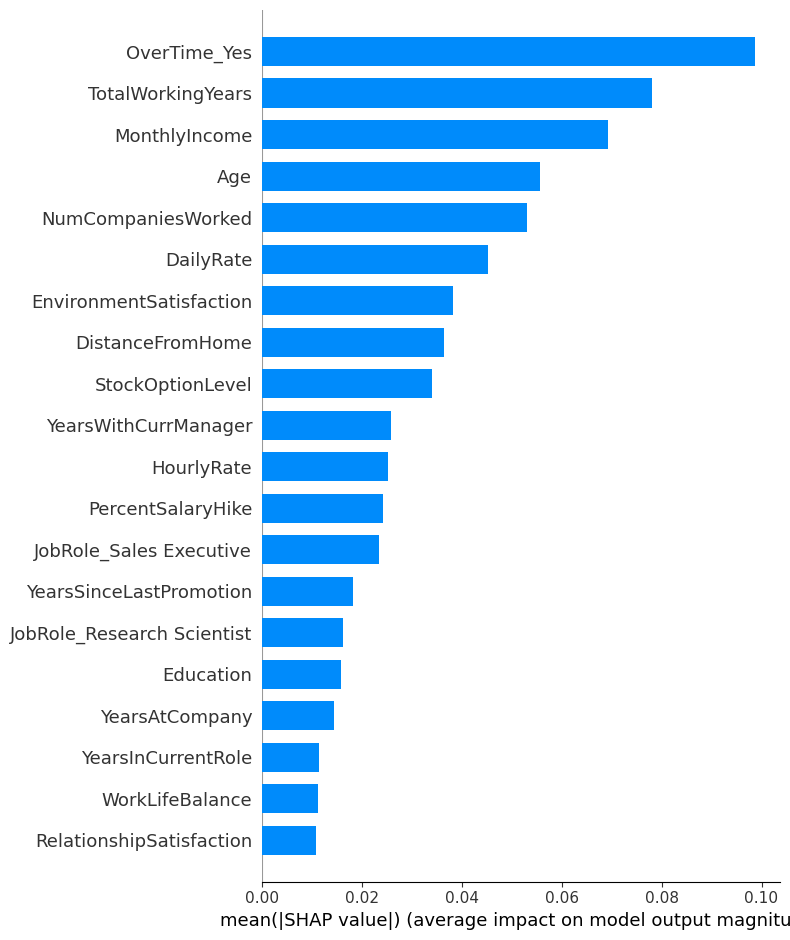

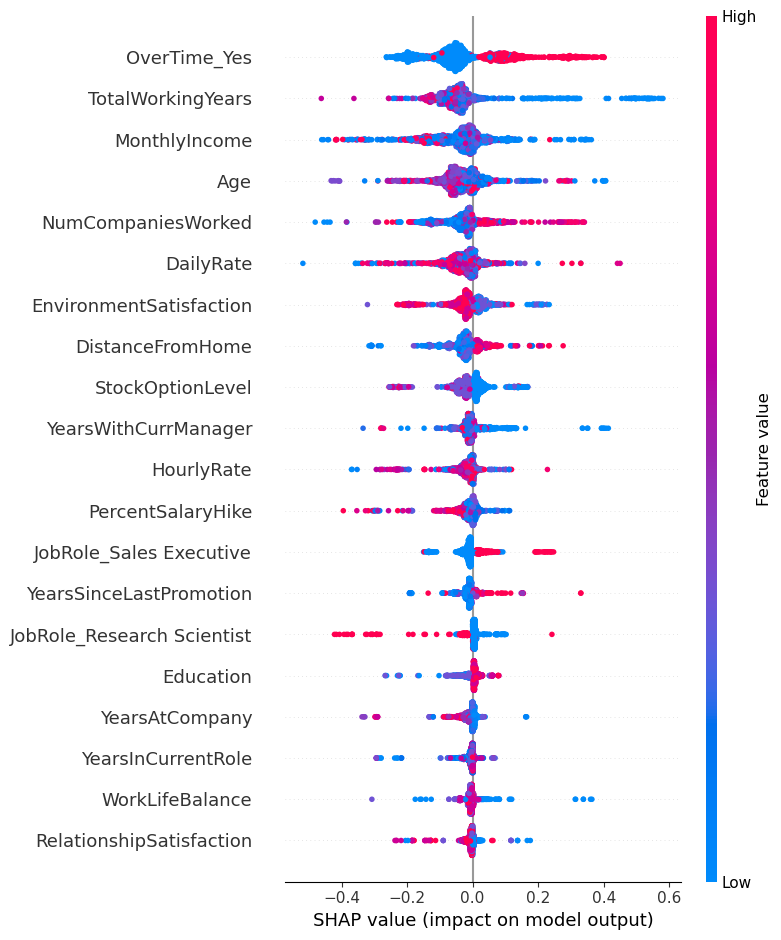

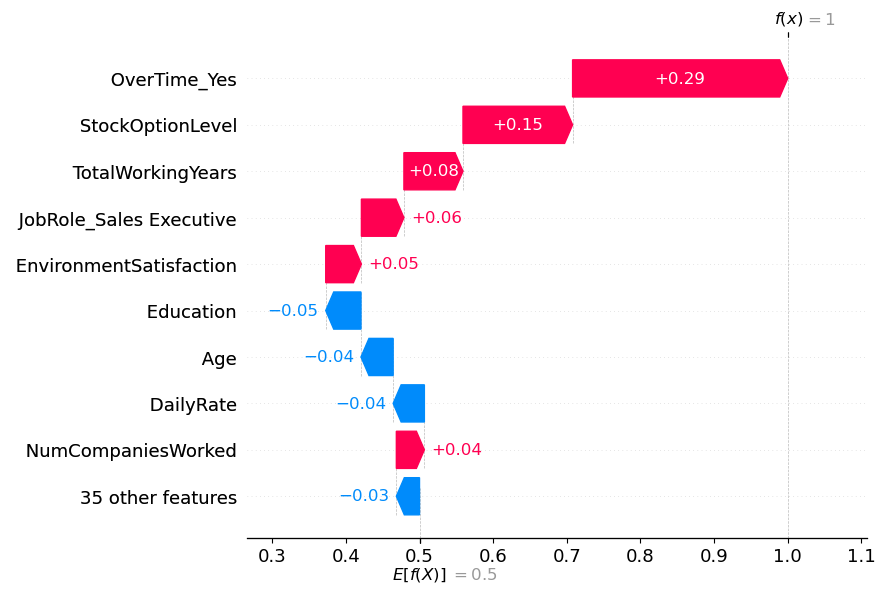

In [13]:
#SHAP
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X_numeric = X.copy().astype(np.float64)

explainer = shap.TreeExplainer(best_tree)
shap_values = explainer.shap_values(X_numeric) 

shap_values = np.array(shap_values)

shap_class1 = shap_values[:, :, 1] 

shap.summary_plot(shap_class1, X_numeric, plot_type="bar")
shap.summary_plot(shap_class1, X_numeric)

shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[1],
    shap_class1[0],
    X_numeric.iloc[0]
)